In [2]:
import pandas as pd 
import numpy as np 
import pylab as plt

In [3]:
data = pd.read_csv("hypotheses/out_T1.csv", index_col=0)
data.head()

,graph_E-q_0,type_E-q_0,E-q_0,correct_E-q_0,trueAnswer_E-q_0,editDist_E-q_0,time_E-q_0,hoverCount_E-q_0,panCount_E-q_0,zoomCount_E-q_0,...,S-q_16.3,correct_S-q_16.3,trueAnswer_S-q_16.3,editDist_S-q_16.3,time_S-q_16.3,hoverCount_S-q_16.3,panCount_S-q_16.3,zoomCount_S-q_16.3,dblclickCount_S-q_16.3,resetCount_S-q_16.3
p_325,e_group_0,T1,option-2,1,option-2,1.000000,15377,10,0,0,...,option-2,1,option-2,1.000000,20034,19,2,0,1,0
p_336,e_group_0,T1,option-2,1,option-2,1.000000,34102,21,0,0,...,option-2,1,option-2,1.000000,36806,32,0,0,0,0
p_338,e_group_0,T1,option-2,1,option-2,1.000000,16937,3,0,0,...,option-3,1,option-3,1.000000,16547,9,0,0,0,0
p_339,e_group_0,T1,option-3,0,option-2,0.666667,12305,9,0,0,...,option-4,0,option-3,0.666667,66614,33,0,0,0,0
p_341,e_group_0,T1,option-2,1,option-2,1.000000,59693,22,0,0,...,option-3,0,option-2,0.666667,26046,21,2,52,1,0


In [9]:
atype = "correct"

In [10]:
task_tables = dict()
for i in range(1,7):
    print(i)
    data = data = pd.read_csv(f"hypotheses/out_T{i}.csv", index_col=0)

    E_corr = data[[col for col in data.columns if f"{atype}_E" in col]].mean(axis=1)
    H_corr = data[[col for col in data.columns if f"{atype}_H" in col]].mean(axis=1)
    S_corr = data[[col for col in data.columns if f"{atype}_S" in col]].mean(axis=1)

    H1a = pd.DataFrame()
    H1a["E"] = E_corr #/ 1000
    H1a["H"] = H_corr #/ 1000
    H1a["S"] = S_corr #/ 1000
    task_tables[i] = H1a.copy()

    vals = list()
    for index, row in H1a.iterrows():
        for col in H1a.columns:
            vals.append([row[col], index, col])
    pd.DataFrame(vals, columns=["values", "participants", "groups"]).to_csv(f"hypotheses/T{i}-factors.csv",index=False)

1
2
3
4
5
6


In [11]:
import scipy.stats as st

['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']
['S', 'H', 'E']


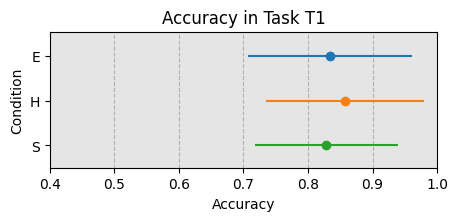

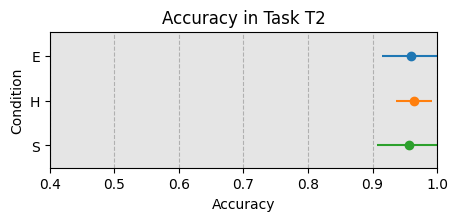

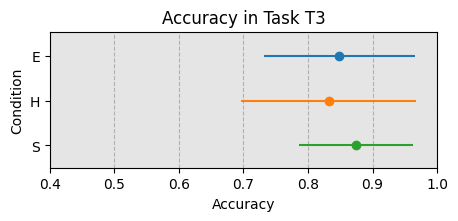

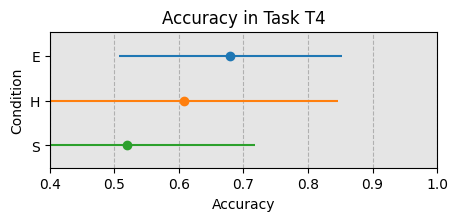

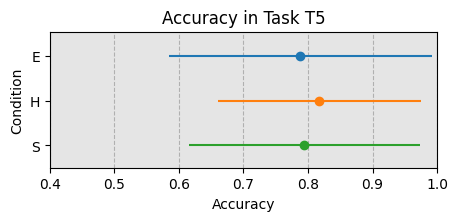

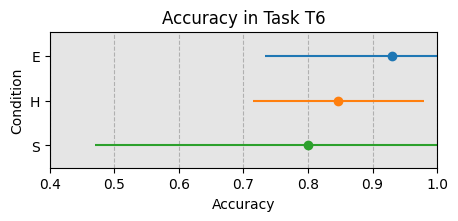

In [13]:
for tnum, T in task_tables.items():
    labels = list("SHE")
    means = [T[g].mean() for g in labels]
    CI = [st.t.interval(confidence=0.95, df=len(T[g])-1, loc=T[g].mean(), scale=st.sem(T[g])) for g in labels ]


    colors = ["tab:blue", "tab:orange", "tab:green"][::-1]
    fig, ax = plt.subplots()
    error_plots = list()
    for i,(mean, (low, high)) in enumerate(zip(means, CI)):
        
        err = ax.errorbar(mean, [i/10], xerr=[abs(low - mean)], fmt='o',color=colors[i%3])
        error_plots.append(err)

    xmin = 0.3
    xmax = 1.0
    ax.set_xlim(xmin, xmax)
    # ax.legend(error_plots[::-1],["E", "H", "S"],loc="upper right")

    print(labels)
    ax.set_yticks([i / 10 for i in range(3)], labels=labels)
    ax.set_ylim(-0.05, 2/10 + 0.055)
    # ax.hlines([0-0.05, 0.25, (5/10 + 0.05)], xmin, xmax, colors="black")
    ax.grid(True,axis='x',linestyle='--')
    # if tnum != 5: 
    ax.axhspan(-0.05,0.35,facecolor="grey",alpha=0.2)


    ax.set_xlabel("Accuracy")
    ax.set_ylabel("Condition")
    ax.set_title(f"Accuracy in Task T{tnum}")
    fig.set_size_inches(5,2)

    # ax2 = ax.twinx()
    # ax2.set_ylim(-0.05, 8/10 + 0.055)
    # ax2.set_yticks([i / 10 for i in range(1,9,3)], ["H1c", "H1b", "H1a"])
    fig.subplots_adjust(bottom=0.2)
    fig.savefig(f"figures/T{tnum}_acc.pdf")
